In [1]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
zip_file = keras.utils.get_file(
    fname="cora.tgz",
    origin="https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz",
    extract=True,
)
data_dir = os.path.join(os.path.dirname(zip_file), "cora")

In [3]:
citations = pd.read_csv(
    os.path.join(data_dir, "cora.cites"),
    sep="\t",
    header=None,
    names=["target", "source"],
)
print("Citations shape:", citations.shape)

Citations shape: (5429, 2)


In [4]:
citations.sample(frac=1).head()

,target,source
2207,19621,1135082
569,2440,1106388
1798,12182,94713
1773,12158,148399
2625,28385,118558


In [5]:
citations.head()

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960


In [6]:
column_names = ["paper_id"] + [f"term_{idx}" for idx in range(1433)] + ["subject"]
papers = pd.read_csv(
    os.path.join(data_dir, "cora.content"), sep="\t", header=None, names=column_names,
)
print("Papers shape:", papers.shape)

Papers shape: (2708, 1435)


In [7]:
citations

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960
...,...,...
5424,853116,19621
5425,853116,853155
5426,853118,1140289
5427,853155,853118


In [8]:
papers

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,...,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1128975,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2704,1128977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2705,1128978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2706,117328,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based


In [9]:
print(papers.sample(100).T)

                      2553                   2318             2085  \
paper_id            687401                 645870           762980   
term_0                   0                      0                0   
term_1                   0                      0                0   
term_2                   0                      0                0   
term_3                   0                      1                0   
...                    ...                    ...              ...   
term_1429                0                      0                0   
term_1430                0                      0                0   
term_1431                0                      0                0   
term_1432                0                      0                0   
subject    Neural_Networks  Probabilistic_Methods  Neural_Networks   

                            1731             2639             2562  \
paper_id                 1131164          1139009           675847   
term_0             

In [10]:
print(papers.head(papers.shape[0]))

      paper_id  term_0  term_1  term_2  term_3  term_4  term_5  term_6  \
0        31336       0       0       0       0       0       0       0   
1      1061127       0       0       0       0       0       0       0   
2      1106406       0       0       0       0       0       0       0   
3        13195       0       0       0       0       0       0       0   
4        37879       0       0       0       0       0       0       0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
2703   1128975       0       0       0       0       0       0       0   
2704   1128977       0       0       0       0       0       0       0   
2705   1128978       0       0       0       0       0       0       0   
2706    117328       0       0       0       0       1       0       0   
2707     24043       0       0       0       0       0       0       0   

      term_7  term_8  ...  term_1424  term_1425  term_1426  term_1427  \
0          0       0  ...          0  

In [11]:
print(papers.subject)

0              Neural_Networks
1                Rule_Learning
2       Reinforcement_Learning
3       Reinforcement_Learning
4        Probabilistic_Methods
                 ...          
2703        Genetic_Algorithms
2704        Genetic_Algorithms
2705        Genetic_Algorithms
2706                Case_Based
2707           Neural_Networks
Name: subject, Length: 2708, dtype: object


In [12]:
print(papers.subject.value_counts())

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: subject, dtype: int64


In [13]:
class_values = sorted(papers["subject"].unique())
# class_values = papers["subject"]

In [14]:
class_values

['Case_Based',
 'Genetic_Algorithms',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Reinforcement_Learning',
 'Rule_Learning',
 'Theory']

In [15]:
class_idx = {name: id for id, name in enumerate(class_values)}
class_idx

{'Case_Based': 0,
 'Genetic_Algorithms': 1,
 'Neural_Networks': 2,
 'Probabilistic_Methods': 3,
 'Reinforcement_Learning': 4,
 'Rule_Learning': 5,
 'Theory': 6}

In [16]:
paper_idx = {name: idx for idx, name in enumerate(sorted(papers["paper_id"].unique()))}
paper_idx

{35: 0,
 40: 1,
 114: 2,
 117: 3,
 128: 4,
 130: 5,
 164: 6,
 288: 7,
 424: 8,
 434: 9,
 463: 10,
 504: 11,
 506: 12,
 887: 13,
 906: 14,
 910: 15,
 936: 16,
 940: 17,
 941: 18,
 943: 19,
 1026: 20,
 1033: 21,
 1034: 22,
 1035: 23,
 1213: 24,
 1237: 25,
 1246: 26,
 1272: 27,
 1365: 28,
 1385: 29,
 1481: 30,
 1688: 31,
 1694: 32,
 1717: 33,
 1786: 34,
 1817: 35,
 1919: 36,
 1949: 37,
 1951: 38,
 1952: 39,
 1953: 40,
 1955: 41,
 1956: 42,
 1959: 43,
 1997: 44,
 1999: 45,
 2354: 46,
 2440: 47,
 2653: 48,
 2654: 49,
 2658: 50,
 2663: 51,
 2665: 52,
 2695: 53,
 2696: 54,
 2698: 55,
 2702: 56,
 3084: 57,
 3085: 58,
 3095: 59,
 3097: 60,
 3101: 61,
 3112: 62,
 3187: 63,
 3191: 64,
 3192: 65,
 3217: 66,
 3218: 67,
 3220: 68,
 3222: 69,
 3223: 70,
 3229: 71,
 3231: 72,
 3232: 73,
 3233: 74,
 3235: 75,
 3236: 76,
 3237: 77,
 3240: 78,
 3243: 79,
 3828: 80,
 3932: 81,
 4274: 82,
 4329: 83,
 4330: 84,
 4335: 85,
 4553: 86,
 4584: 87,
 4637: 88,
 4649: 89,
 4660: 90,
 4804: 91,
 4878: 92,
 4983: 93

In [17]:

papers["paper_id"] = papers["paper_id"].apply(lambda name: paper_idx[name])
citations["source"] = citations["source"].apply(lambda name: paper_idx[name])
citations["target"] = citations["target"].apply(lambda name: paper_idx[name])
papers["subject"] = papers["subject"].apply(lambda value: class_idx[value])

In [18]:
papers

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,...,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,462,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
1,1911,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5
2,2002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,248,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,519,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,2370,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2704,2371,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2705,2372,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2706,955,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
papers[papers['paper_id'] == 462]

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,...,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,462,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2


In [20]:
citations[citations['target']==35]

,target,source
510,35,2150


In [21]:
citations

,target,source
0,0,21
1,0,905
2,0,906
3,0,1909
4,0,1940
...,...,...
5424,1873,328
5425,1873,1876
5426,1874,2586
5427,1876,1874


In [22]:
# class_values = sorted(papers["subject"].unique())
# class_idx = {name: id for id, name in enumerate(class_values)}
# paper_idx = {name: idx for idx, name in enumerate(sorted(papers["paper_id"].unique()))}

# papers["paper_id"] = papers["paper_id"].apply(lambda name: paper_idx[name])
# citations["source"] = citations["source"].apply(lambda name: paper_idx[name])
# citations["target"] = citations["target"].apply(lambda name: paper_idx[name])
# papers["subject"] = papers["subject"].apply(lambda value: class_idx[value])

In [23]:
!pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


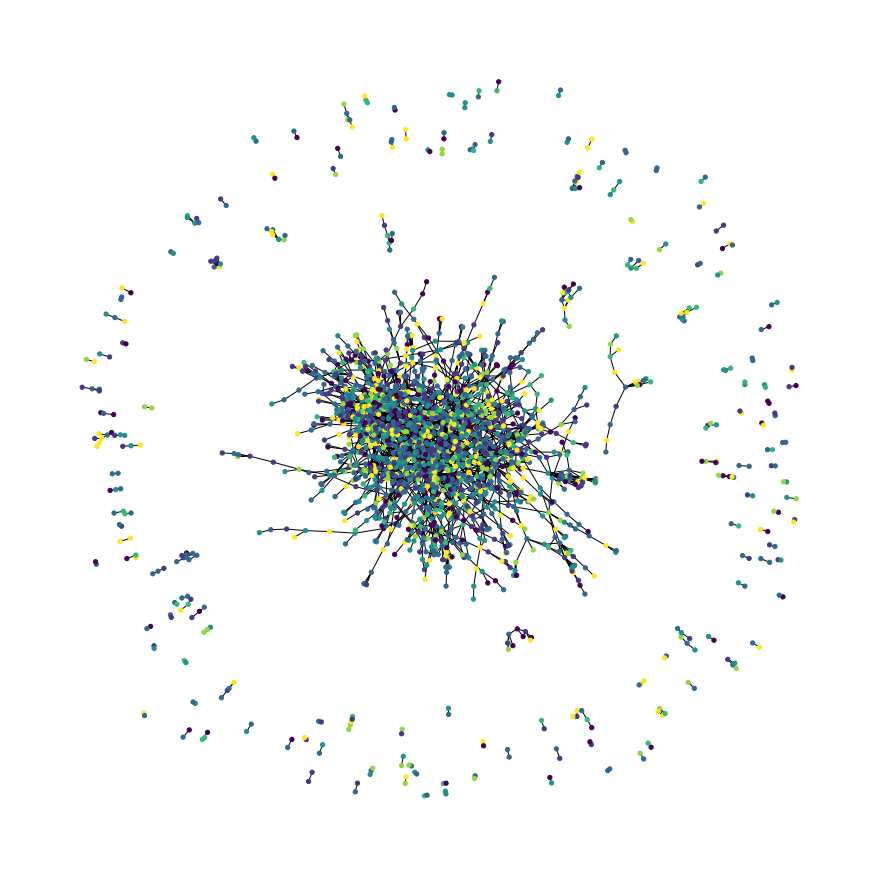

In [24]:
plt.figure(figsize=(12,12))
colors = papers["subject"].tolist()
cora_graph = nx.from_pandas_edgelist(citations.sample(n=3000))
subjects = list(papers[papers["paper_id"].isin(list(cora_graph.nodes))]["subject"])
nx.draw_spring(cora_graph, node_size=18, node_color=subjects)
     

In [25]:
train_data, test_data = [], []

for _, group_data in papers.groupby("subject"):
    # Select around 60% of the dataset for training.
    # print(_," ",group_data)
    # print(len(group_data.index))
    random_selection = np.random.rand(len(group_data.index)) <= 0.6
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (1572, 1435)
Test data shape: (1136, 1435)


In [26]:
hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 300
batch_size = 256

In [27]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

In [28]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

In [29]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [30]:
b=create_ffn([32,32],0.5)
print(b)

In [31]:
!pip install netron


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.4 MB/s eta 0:00:00


In [33]:
# from keras.models import save_model
# save_model(a, 'model.h5')

# netron model.h5

In [34]:
papers.columns

Index(['paper_id', 'term_0', 'term_1', 'term_2', 'term_3', 'term_4', 'term_5',
       'term_6', 'term_7', 'term_8',
       ...
       'term_1424', 'term_1425', 'term_1426', 'term_1427', 'term_1428',
       'term_1429', 'term_1430', 'term_1431', 'term_1432', 'subject'],
      dtype='object', length=1435)

In [35]:
feature_names = set(papers.columns) - {"paper_id", "subject"}
feature_names

{'term_498',
 'term_559',
 'term_555',
 'term_1296',
 'term_612',
 'term_52',
 'term_892',
 'term_1190',
 'term_542',
 'term_176',
 'term_97',
 'term_528',
 'term_1057',
 'term_1420',
 'term_939',
 'term_941',
 'term_1387',
 'term_1239',
 'term_1078',
 'term_397',
 'term_601',
 'term_193',
 'term_103',
 'term_27',
 'term_1115',
 'term_1228',
 'term_469',
 'term_859',
 'term_186',
 'term_114',
 'term_37',
 'term_940',
 'term_3',
 'term_695',
 'term_1427',
 'term_686',
 'term_156',
 'term_1068',
 'term_257',
 'term_523',
 'term_314',
 'term_409',
 'term_1319',
 'term_947',
 'term_65',
 'term_293',
 'term_81',
 'term_1317',
 'term_418',
 'term_1000',
 'term_90',
 'term_985',
 'term_460',
 'term_1048',
 'term_509',
 'term_595',
 'term_787',
 'term_140',
 'term_1181',
 'term_570',
 'term_38',
 'term_308',
 'term_305',
 'term_426',
 'term_872',
 'term_61',
 'term_543',
 'term_813',
 'term_1105',
 'term_181',
 'term_172',
 'term_920',
 'term_136',
 'term_1006',
 'term_1009',
 'term_1060',
 't

In [36]:
len(feature_names)

1433

In [37]:
feature_names = set(papers.columns) - {"paper_id", "subject"}
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["subject"]
y_test = test_data["subject"]

In [38]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
len(x_test)

1136

In [41]:
train_data

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,...,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
541,1244,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
904,1702,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2335,969,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1611,2143,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
723,1178,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,776,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1396,1630,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1924,620,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6
1290,374,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [42]:

y_train

541     0
904     3
2335    2
1611    1
723     3
       ..
1779    4
1396    1
1924    6
1290    6
181     6
Name: subject, Length: 1572, dtype: int64

In [43]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features (InputLayer)    [(None, 1433)]       0           []                               
                                                                                                  
 ffn_block1 (Sequential)        (None, 32)           52804       ['input_features[0][0]']         
                                                                                                  
 ffn_block2 (Sequential)        (None, 32)           2368        ['ffn_block1[0][0]']             
                                                                                                  
 skip_connection2 (Add)         (None, 32)           0           ['ffn_block1[0][0]',             
                                                                  'ffn_block2[0][0]']      

In [44]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/300
6/6 [==============================] - 7s 130ms/step - loss: 3.3754 - acc: 0.1879 - val_loss: 1.8792 - val_acc: 0.3305
Epoch 2/300
6/6 [==============================] - 0s 27ms/step - loss: 2.4942 - acc: 0.2403 - val_loss: 1.8747 - val_acc: 0.3390
Epoch 3/300
6/6 [==============================] - 0s 28ms/step - loss: 2.1805 - acc: 0.2418 - val_loss: 1.8528 - val_acc: 0.3983
Epoch 4/300
6/6 [==============================] - 0s 24ms/step - loss: 2.0169 - acc: 0.2904 - val_loss: 1.7969 - val_acc: 0.3390
Epoch 5/300
6/6 [==============================] - 0s 23ms/step - loss: 1.8783 - acc: 0.3278 - val_loss: 1.7798 - val_acc: 0.3559
Epoch 6/300
6/6 [==============================] - 0s 25ms/step - loss: 1.8345 - acc: 0.3024 - val_loss: 1.7707 - val_acc: 0.4110
Epoch 7/300
6/6 [==============================] - 0s 31ms/step - loss: 1.7050 - acc: 0.3645 - val_loss: 1.7705 - val_acc: 0.4492
Epoch 8/300
6/6 [==============================] - 0s 27ms/step - loss: 1.6504 - acc: 0.3

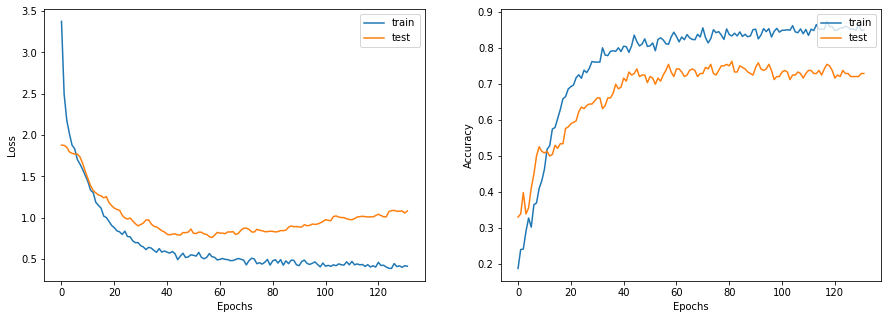

In [45]:
display_learning_curves(history)

In [46]:
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")
# _ to be ignored

Test accuracy: 73.77%


In [47]:
x_train.mean(axis=0)

array([0.00318066, 0.00445293, 0.        , ..., 0.01145038, 0.0019084 ,
       0.02926209])

In [48]:
def generate_random_instances(num_instances):
    token_probability = x_train.mean(axis=0)
    instances = []
    for _ in range(num_instances):
        probabilities = np.random.uniform(size=len(token_probability))
        instance = (probabilities <= token_probability).astype(int)
        instances.append(instance)

    return np.array(instances)


def display_class_probabilities(probabilities):
    for instance_idx, probs in enumerate(probabilities):
        print(f"Instance {instance_idx + 1}:")
        for class_idx, prob in enumerate(probs):
            print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")

In [49]:
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

1/1 [==============================] - 0s 410ms/step
Instance 1:
- Case_Based: 0.28%
- Genetic_Algorithms: 1.17%
- Neural_Networks: 81.34%
- Probabilistic_Methods: 2.55%
- Reinforcement_Learning: 0.06%
- Rule_Learning: 0.44%
- Theory: 14.15%
Instance 2:
- Case_Based: 45.43%
- Genetic_Algorithms: 24.06%
- Neural_Networks: 3.13%
- Probabilistic_Methods: 2.56%
- Reinforcement_Learning: 24.04%
- Rule_Learning: 0.51%
- Theory: 0.27%
Instance 3:
- Case_Based: 0.01%
- Genetic_Algorithms: 0.67%
- Neural_Networks: 99.18%
- Probabilistic_Methods: 0.13%
- Reinforcement_Learning: 0.01%
- Rule_Learning: 0.0%
- Theory: 0.0%
Instance 4:
- Case_Based: 14.38%
- Genetic_Algorithms: 2.24%
- Neural_Networks: 3.47%
- Probabilistic_Methods: 5.33%
- Reinforcement_Learning: 11.2%
- Rule_Learning: 3.56%
- Theory: 59.83%
Instance 5:
- Case_Based: 4.07%
- Genetic_Algorithms: 0.64%
- Neural_Networks: 76.4%
- Probabilistic_Methods: 18.18%
- Reinforcement_Learning: 0.08%
- Rule_Learning: 0.09%
- Theory: 0.53%
Insta

In [50]:
edges = citations[["source", "target"]].to_numpy().T

In [51]:
edges

array([[  21,  905,  906, ..., 2586, 1874, 2707],
       [   0,    0,    0, ..., 1874, 1876, 1897]])

In [52]:
edge_weights = tf.ones(shape=edges.shape[1])

In [53]:
print(edge_weights)
edge_weights

tf.Tensor([1. 1. 1. ... 1. 1. 1.], shape=(5429,), dtype=float32)


<tf.Tensor: shape=(5429,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [54]:
node_features = tf.cast(
    papers.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)

In [55]:
node_features

<tf.Tensor: shape=(2708, 1433), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [56]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = citations[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    papers.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 5429)
Nodes shape: (2708, 1433)


In [57]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)
 
    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

In [58]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)

In [59]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[-0.07599492 -0.01358408  0.29112425  0.11235242  0.15457228  0.01277473
  -0.02584476]
 [ 0.11570065  0.0516538  -0.06671914  0.02877484  0.02107761  0.03565107
  -0.11279641]
 [ 0.01005912  0.06904124  0.10090336 -0.01225192  0.00562508 -0.1353164
   0.05782971]], shape=(3, 7), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (2708, 32)                52804     
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                             

In [60]:
x_train = train_data.paper_id.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)

Epoch 1/300
6/6 [==============================] - 6s 296ms/step - loss: 2.1587 - acc: 0.1939 - val_loss: 1.9030 - val_acc: 0.3305
Epoch 2/300
6/6 [==============================] - 1s 177ms/step - loss: 1.9686 - acc: 0.2575 - val_loss: 1.9091 - val_acc: 0.3347
Epoch 3/300
6/6 [==============================] - 1s 179ms/step - loss: 1.9071 - acc: 0.2582 - val_loss: 1.8935 - val_acc: 0.3305
Epoch 4/300
6/6 [==============================] - 1s 176ms/step - loss: 1.8849 - acc: 0.2725 - val_loss: 1.8737 - val_acc: 0.3305
Epoch 5/300
6/6 [==============================] - 1s 181ms/step - loss: 1.8482 - acc: 0.2874 - val_loss: 1.8613 - val_acc: 0.3686
Epoch 6/300
6/6 [==============================] - 1s 181ms/step - loss: 1.8103 - acc: 0.3069 - val_loss: 1.8517 - val_acc: 0.4237
Epoch 7/300
6/6 [==============================] - 1s 176ms/step - loss: 1.8005 - acc: 0.3069 - val_loss: 1.8305 - val_acc: 0.4322
Epoch 8/300
6/6 [==============================] - 1s 180ms/step - loss: 1.7703 - a

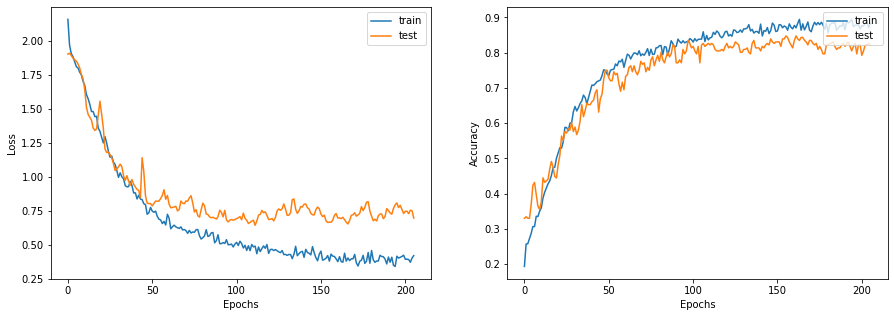

In [61]:
display_learning_curves(history)

In [62]:
x_test = test_data.paper_id.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 83.27%


In [63]:
# First we add the N new_instances as nodes to the graph
# by appending the new_instance to node_features.
num_nodes = node_features.shape[0]
new_node_features = np.concatenate([node_features, new_instances])
# Second we add the M edges (citations) from each new node to a set
# of existing nodes in a particular subject
new_node_indices = [i + num_nodes for i in range(num_classes)]
new_citations = []
for subject_idx, group in papers.groupby("subject"):
    subject_papers = list(group.paper_id)
    # Select random x papers specific subject.
    selected_paper_indices1 = np.random.choice(subject_papers, 5)
    # Select random y papers from any subject (where y < x).
    selected_paper_indices2 = np.random.choice(list(papers.paper_id), 2)
    # Merge the selected paper indices.
    selected_paper_indices = np.concatenate(
        [selected_paper_indices1, selected_paper_indices2], axis=0
    )
    # Create edges between a citing paper idx and the selected cited papers.
    citing_paper_indx = new_node_indices[subject_idx]
    for cited_paper_idx in selected_paper_indices:
        new_citations.append([citing_paper_indx, cited_paper_idx])

new_citations = np.array(new_citations).T
new_edges = np.concatenate([edges, new_citations], axis=1)

In [64]:
print("Original node_features shape:", gnn_model.node_features.shape)
print("Original edges shape:", gnn_model.edges.shape)
gnn_model.node_features = new_node_features
gnn_model.edges = new_edges
gnn_model.edge_weights = tf.ones(shape=new_edges.shape[1])
print("New node_features shape:", gnn_model.node_features.shape)
print("New edges shape:", gnn_model.edges.shape)

logits = gnn_model.predict(tf.convert_to_tensor(new_node_indices))
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

Original node_features shape: (2708, 1433)
Original edges shape: (2, 5429)
New node_features shape: (2715, 1433)
New edges shape: (2, 5478)
1/1 [==============================] - 2s 2s/step
Instance 1:
- Case_Based: 33.09%
- Genetic_Algorithms: 25.97%
- Neural_Networks: 20.92%
- Probabilistic_Methods: 3.65%
- Reinforcement_Learning: 1.24%
- Rule_Learning: 3.27%
- Theory: 11.87%
Instance 2:
- Case_Based: 0.31%
- Genetic_Algorithms: 98.56%
- Neural_Networks: 0.24%
- Probabilistic_Methods: 0.01%
- Reinforcement_Learning: 0.84%
- Rule_Learning: 0.0%
- Theory: 0.04%
Instance 3:
- Case_Based: 0.01%
- Genetic_Algorithms: 0.07%
- Neural_Networks: 99.72%
- Probabilistic_Methods: 0.16%
- Reinforcement_Learning: 0.01%
- Rule_Learning: 0.0%
- Theory: 0.03%
Instance 4:
- Case_Based: 1.2%
- Genetic_Algorithms: 0.09%
- Neural_Networks: 1.69%
- Probabilistic_Methods: 91.9%
- Reinforcement_Learning: 0.34%
- Rule_Learning: 2.08%
- Theory: 2.69%
Instance 5:
- Case_Based: 3.16%
- Genetic_Algorithms: 27.79